In [1]:
#mass is in units of 10e10 M_solar
#distances are in Kpc

#standard imports
import glob
from pygadgetreader import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

#setting matplotlib parameters
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 

In [2]:
#set matplotlib global font size
matplotlib.rcParams['font.size']=14

In [4]:
#reading in the data
snap_folder = '/home/ryan/Downloads/snapdir_093/'
snaps = glob.glob(snap_folder + '*.hdf5')

snap = snaps[0]
readheader(snap, 'header')

{'npartThisFile': array([46244,  2097, 44072,     0,    10,     0], dtype=int32),
 'npartTotal': array([2308324,  114400, 2190078,       0,    3529,      11], dtype=uint32),
 'npartTotalHW': array([0, 0, 0, 0, 0, 0], dtype=uint32),
 'ngas': 2308324,
 'ndm': 114400,
 'ndisk': 2190078,
 'nbulge': 0,
 'nstar': 3529,
 'nbndry': 11,
 'massTable': array([0.        , 0.00660847, 0.        , 0.        , 0.        ,
        0.        ]),
 'time': 0.645900913444394,
 'nfiles': 50,
 'redshift': 0.5482250902345109,
 'boxsize': 100000.0,
 'O0': 0.301712,
 'Ol': 0.698288,
 'h': 0.6909,
 'flag_cooling': 1,
 'flag_sfr': 1,
 'flag_fb': 1,
 'flag_fh2': 0,
 'flag_age': 0,
 'flag_metals': 0,
 'flag_potential': 1,
 'flag_delaytime': 0,
 'flag_tmax': 0,
 'rhocrit': 1.6300890043833293e-29}

In [5]:
#extracting position and mass for all particles

GAS_X = []
GAS_Y = []
GAS_Z = []

DM_X = []
DM_Y = []
DM_Z = []

GAS_MASS = []
DM_MASS = []

for snap in snaps:

    gas_pos = readsnap(snap, 'pos', 'gas')
    gas_mass = readsnap(snap, 'mass', 'gas')

    dm_pos = readsnap(snap, 'pos', 'dm')
    dm_mass = readsnap(snap, 'mass', 'dm')

    #extracting coordinates
    gas_x = gas_pos[:, 0]
    gas_y = gas_pos[:, 1]
    gas_z = gas_pos[:, 2]

    dm_x = dm_pos[:, 0]
    dm_y = dm_pos[:, 1]
    dm_z = dm_pos[:, 2]
    
    #packaging
    
    GAS_X.append(gas_x)
    GAS_Y.append(gas_y)
    GAS_Z.append(gas_z)
    
    DM_X.append(dm_x)
    DM_Y.append(dm_y)
    DM_Z.append(dm_z)
    
    GAS_MASS.append(gas_mass)
    DM_MASS.append(dm_mass)

Returning GAS   Positions
Returning GAS   Mass
Returning DM    Positions
Returning DM    Mass
Returning GAS   Positions
Returning GAS   Mass
Returning DM    Positions
Returning DM    Mass
Returning GAS   Positions
Returning GAS   Mass
Returning DM    Positions
Returning DM    Mass
Returning GAS   Positions
Returning GAS   Mass
Returning DM    Positions
Returning DM    Mass
Returning GAS   Positions
Returning GAS   Mass
Returning DM    Positions
Returning DM    Mass
Returning GAS   Positions
Returning GAS   Mass
Returning DM    Positions
Returning DM    Mass
Returning GAS   Positions
Returning GAS   Mass
Returning DM    Positions
Returning DM    Mass
Returning GAS   Positions
Returning GAS   Mass
Returning DM    Positions
Returning DM    Mass
Returning GAS   Positions
Returning GAS   Mass
Returning DM    Positions
Returning DM    Mass
Returning GAS   Positions
Returning GAS   Mass
Returning DM    Positions
Returning DM    Mass
Returning GAS   Positions
Returning GAS   Mass
Returning DM 

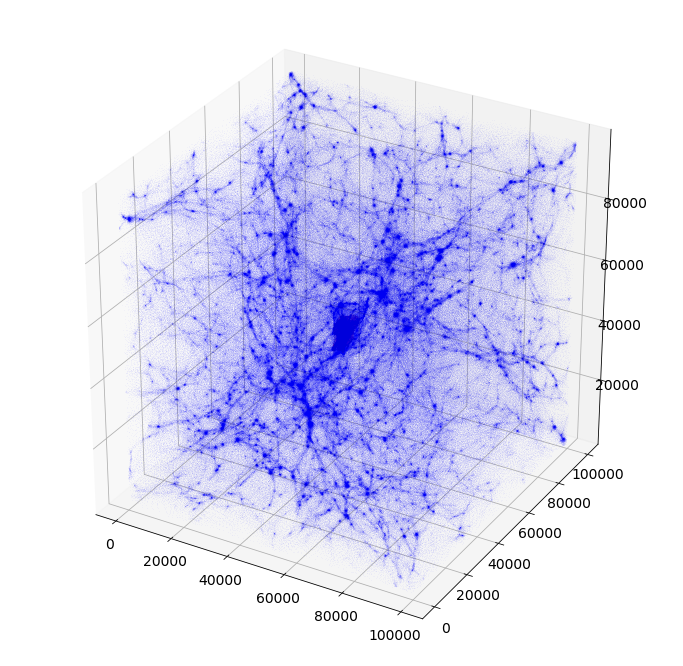

In [7]:
#plotting the positions

fig = plt.figure(figsize=[12,12])

ax = fig.add_subplot(1,1,1, projection='3d')

ax.plot3D(dm_x, dm_y, dm_z,'o', color='r',markersize=0.1, alpha=0.1)
ax.plot3D(gas_x, gas_y, gas_z, 'o', color='b', markersize=0.1, alpha=0.1)
#ax.set_xlim3d(-300, 300)
#ax.set_ylim3d(-300, 300)
#ax.set_zlim3d(-300, 300)

In [ ]:
#plotting the positions

fig = plt.figure(figsize=[12,12])

ax = fig.add_subplot(1,1,1, projection='3d')

for dm_x, dm_y, dm_z, gas_x, gas_y, gas_z in zip(DM_X, DM_Y, DM_Z, GAS_X, GAS_Y, GAS_Z):

    ax.plot3D(dm_x, dm_y, dm_z,'o', color='r',markersize=0.1, alpha=0.5)
    ax.plot3D(gas_x, gas_y, gas_z, 'o', color='b', markersize=0.1, alpha=0.5)
    #ax.set_xlim3d(-300, 300)
    #ax.set_ylim3d(-300, 300)
    #ax.set_zlim3d(-300, 300)